In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.config import ParamLimits
from pyloki.simulation.pulse import PulseSignalConfig

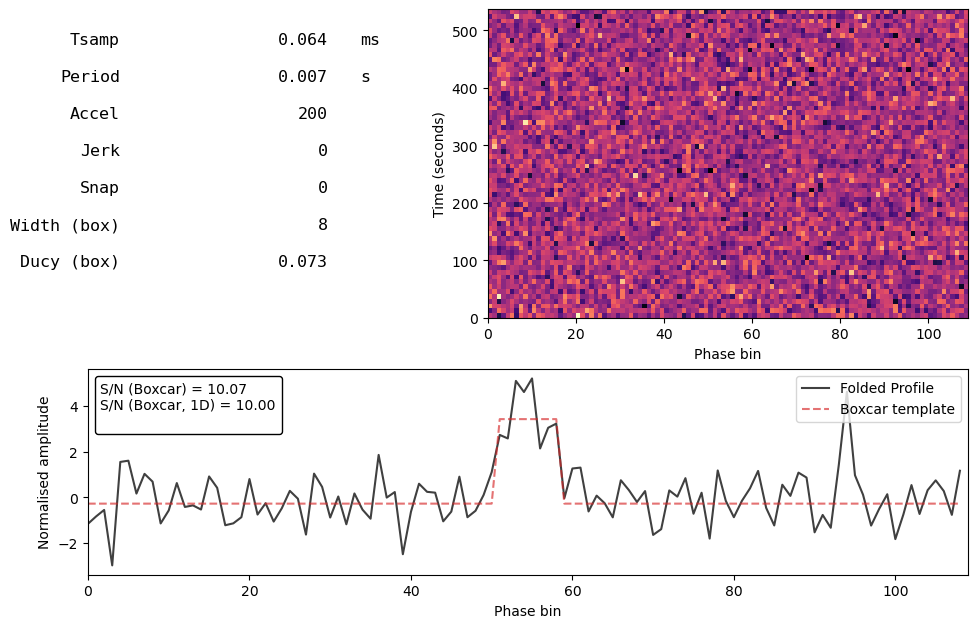

In [2]:
pulsar_period = 0.007
dt = 64e-6
accel = 200
nsamps = 2**23
mod_kwargs = {"acc": accel}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=10, ducy=0.1,
                        mod_kwargs=mod_kwargs)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
tol_bins = 1
fold_bins = 64
p = ParamLimits.from_upper([accel, cfg.freq], (-accel * 5, accel * 5), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 16384
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, nthreads=8, use_fft_shifts=False)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

Param limits: [(np.float64(-1000.0), np.float64(1000.0)), (np.float64(142.72922795714322), np.float64(142.98505775714247))]
[2025-08-18 18:34:56.976] [info] FFA Memory Usage: 2.30 GB (1 buffers) + 0.08 GB (coords)
[2025-08-18 18:34:57.180] [info] FFA::execute started
[2025-08-18 18:34:57.304] [info] FFA::initialize started
[2025-08-18 18:34:57.305] [info] FFA::initialize took 1 ms
[2025-08-18 18:34:57.484] [info] FFA::execute took 303 ms


In [4]:
print(pgram.get_indices_summary(true_values={"accel": cfg.mod_kwargs["acc"], "freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (659, 2197)
Best param indices: (np.int64(660), np.int64(2196), np.int64(4))
Best S/N: 8.93
Best Period: 0.007000002851607213
Best accel: 201.8181818181818
Best freq: 142.857084661101
Best width: 6


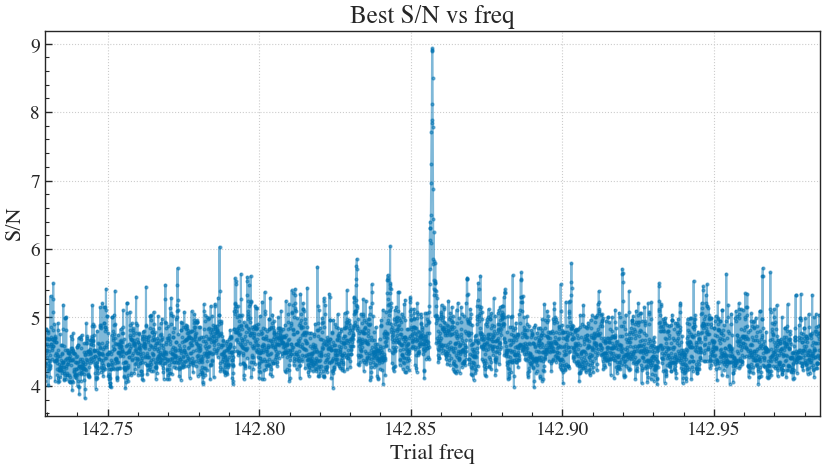

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

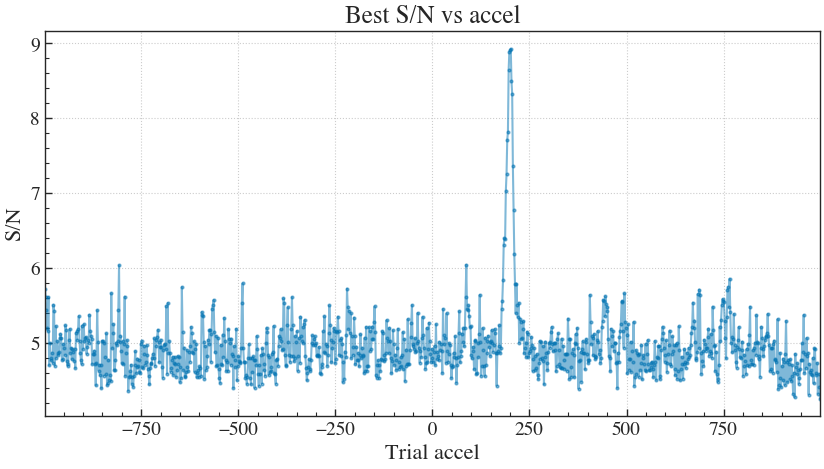

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

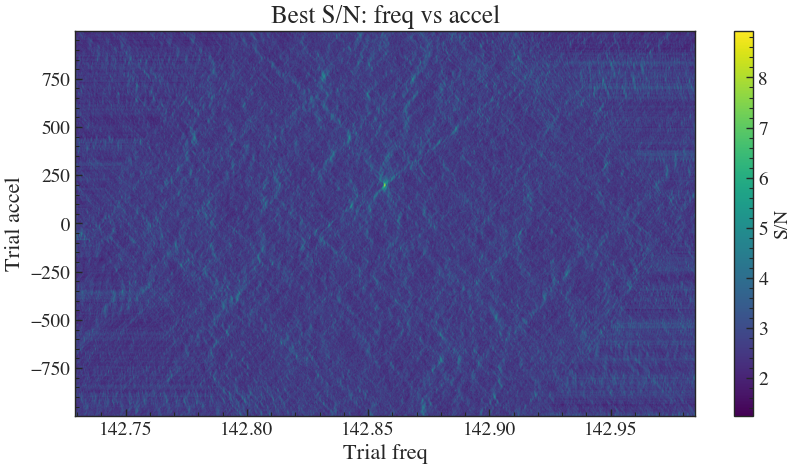

In [7]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()

### FFT-SHIFT Search

In [8]:
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, nthreads=8, use_fft_shifts=True)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

[2025-08-18 18:34:58.988] [info] FFACOMPLEX Memory Usage: 2.38 GB (1 buffers) + 0.08 GB (coords)
[2025-08-18 18:34:59.208] [info] FFACOMPLEX::execute started
[2025-08-18 18:34:59.321] [info] FFACOMPLEX::initialize started
[2025-08-18 18:34:59.335] [info] FFACOMPLEX::initialize took 13 ms
[2025-08-18 18:34:59.545] [info] FFACOMPLEX::execute took 336 ms


In [9]:
print(pgram.get_indices_summary(true_values={"accel": cfg.mod_kwargs["acc"], "freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (659, 2197)
Best param indices: (np.int64(659), np.int64(2197), np.int64(3))
Best S/N: 9.49
Best Period: 0.007
Best accel: 200.0
Best freq: 142.85714285714286
Best width: 4


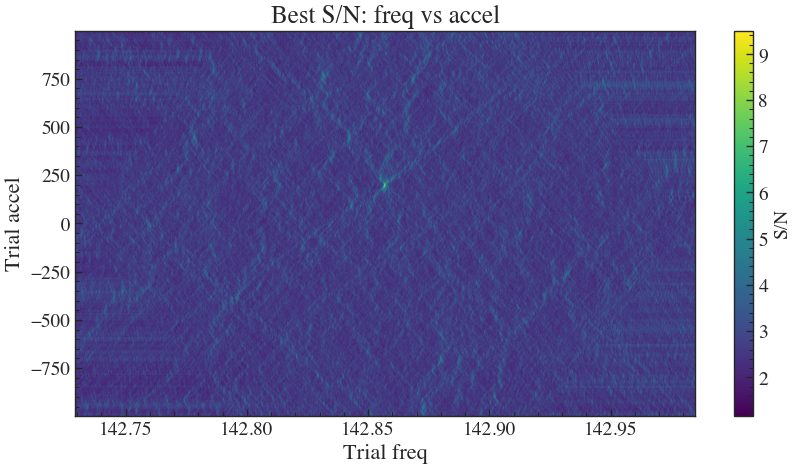

In [10]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()